Zomato Data Set

### Data Loading

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pyod

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
# Reads a .csv as pandas dataframe.
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Data Cleansing

Let's check for missing values. From the figure below, we see that there's no missing data.

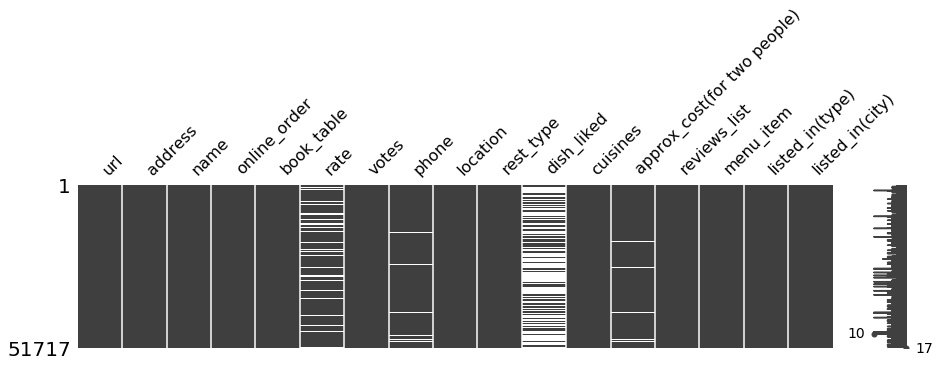

In [5]:
msno.matrix(df, figsize=(15, 3));

The column `dish_liked` has too many missing data. It's not worthing using it. Hence, we will deleted it. Some other columns, like `url`, `phone`, `name` or the full `address` don't justify a restaurant rate or review, so we will also get rid of these.

In [6]:
df.drop(['dish_liked', 'phone', 'address', 'url'], axis=1, inplace=True)

Also, `location` and `listed_in(city)` are the same columns. So, we can drop one of them. 

In [7]:
df.drop('listed_in(city)', axis=1, inplace=True)

Now, let's rename some columns to provide better readability.

In [8]:
df.rename(columns={
    'approx_cost(for two people)': 'average_cost', 
    'listed_in(type)': 'restaurant_type'
}, inplace=True)

We are not going to use `reviews_list` and `menu_item` as well, since they are textual fields containing list of strings that would required natural language processing techniques to be useful. 

In [9]:
df.drop(['reviews_list', 'menu_item'], axis=1, inplace=True)

In [10]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost,restaurant_type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


We can observe an extra */5* in the `rate` column. We are going to clean this. There's also some rows filled with `NEW` and `-`. 

In [11]:
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))
df = df[(df['rate'] != 'NEW') & (df['rate'] != '-')]

We also have to convert the `average_cost` column to the proper format.

In [12]:
df['average_cost'] = df['average_cost'].astype(str)
df['average_cost'] = df['average_cost'].apply(lambda x: x.replace(',','.'))

Finally, let's adjust the column's types.

In [13]:
df['name'] = df['name'].astype(str)
df['online_order'] = df['online_order'].astype(str)
df['book_table'] = df['book_table'].astype(str)
df['location'] = df['location'].astype(str)
df['rest_type'] = df['rest_type'].astype(str)
df['cuisines'] = df['cuisines'].astype(str)
df['restaurant_type'] = df['restaurant_type'].astype(str)

df['rate'] = df['rate'].astype(float)
df['average_cost'] = df['average_cost'].astype(float)

df['votes'] = df['votes'].astype(int)

df.dtypes

name                object
online_order        object
book_table          object
rate               float64
votes                int64
location            object
rest_type           object
cuisines            object
average_cost       float64
restaurant_type     object
dtype: object

### Exploratory Data Analysis

In [14]:
import seaborn as sns

#### Numerical Features

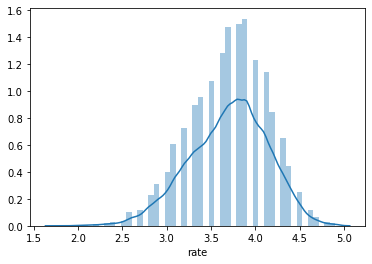

In [16]:
sns.distplot(df['rate'].dropna());

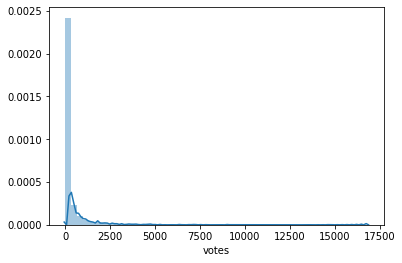

In [17]:
sns.distplot(df['votes']);

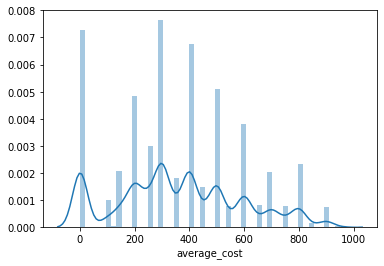

In [19]:
sns.distplot(df['average_cost'].dropna());

#### Categorical Features

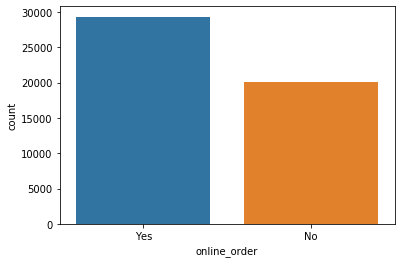

In [20]:
sns.countplot(df['online_order']);

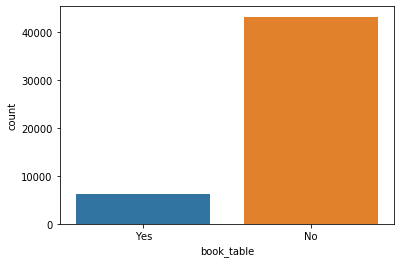

In [21]:
sns.countplot(df['book_table']);

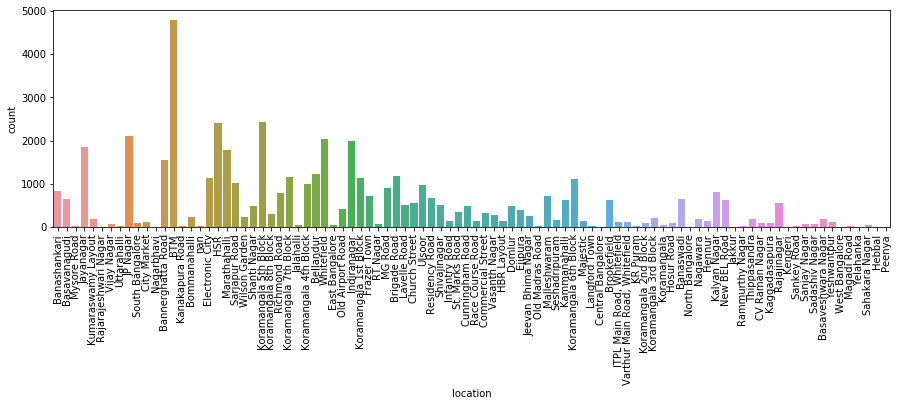

In [26]:
plt.figure(figsize=(15, 4))
chart = sns.countplot(df['location'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

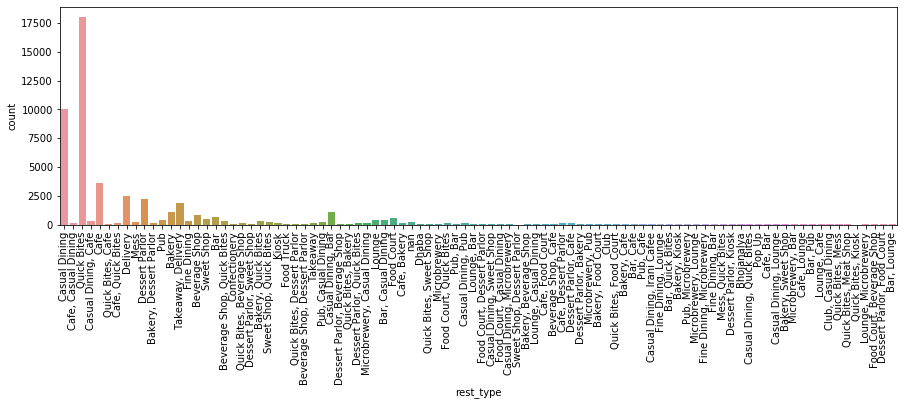

In [27]:
plt.figure(figsize=(15, 4))
chart = sns.countplot(df['rest_type'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

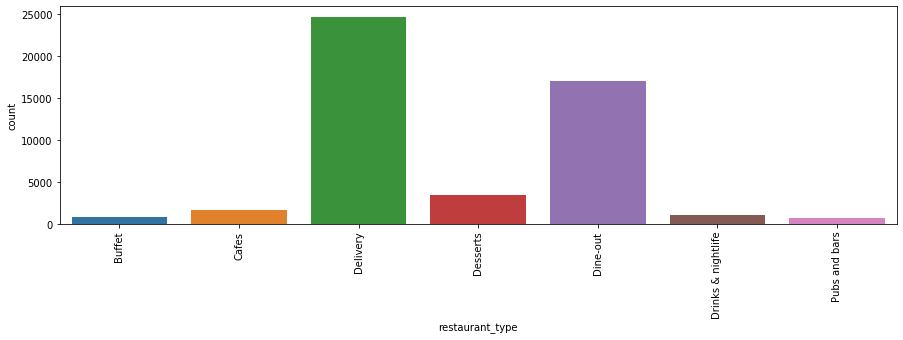

In [29]:
plt.figure(figsize=(15, 4))
chart = sns.countplot(df['restaurant_type'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Modeling

The methods that we are going to use don't handle `nan` values. We will fill them with the average score.

In [30]:
df['rate'].fillna(df['rate'].mean(), inplace=True)
df['average_cost'].fillna(df['average_cost'].mean(), inplace=True)

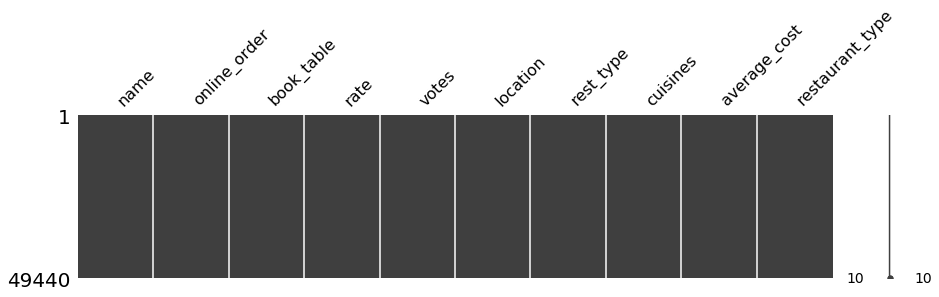

In [31]:
msno.matrix(df, figsize=(15, 3));

In [32]:
from pyod.models.abod import ABOD
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN

In [33]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'average_cost', 'restaurant_type'],
      dtype='object')

It's necsessary to encode the categorical features to use most of the models available in Python.

In [35]:
from sklearn.preprocessing import LabelEncoder

categorical = ['online_order', 'book_table', 
               'location', 'rest_type',
               'cuisines', 'restaurant_type']

# Just in case we want to reverse the encoder
encoders = {}

for cat in categorical:
    le = LabelEncoder()
    le = le.fit(df[cat])
    df[cat] = le.transform(df[cat])
    print(f'{cat}: {len(le.classes_)}')
    encoders[cat] = le

online_order: 2
book_table: 2
location: 94
rest_type: 94
cuisines: 2633
restaurant_type: 7


This time we are going time we are going to use an specialized Python librady (`pyod`) for outlier detection. This library contains a varied set of methods to detect outliers in a data set. For each one of them, it is necessary to define the contamination percentage. 

In [36]:
outliers_fraction = 0.1

We are going to experiment the following methods:

1. Angle-Based Outlier Detection (ABOD)

    - It considers the relationship between each point and its neighbor(s). It does not consider the relationships among these neighbors. The variance of its weighted cosine scores to all neighbors could be viewed as the outlying score
    - ABOD performs well on multi-dimensional data
    
2. k-Nearest Neighbors Detector

    - For any data point, the distance to its kth nearest neighbor could be viewed as the outlying score

3. Isolation Forest

    - It uses the scikit-learn library internally. In this method, data partitioning is done using a set of trees. Isolation Forest provides an anomaly score looking at how isolated the point is in the structure. The anomaly score is then used to identify outliers from normal observations
     - Isolation Forest performs well on multi-dimensional data

4. Histogram-based Outlier Detection

    - It is an efficient unsupervised method which assumes the feature independence and calculates the outlier score by building histograms

In [37]:
classifiers = {
    'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction,random_state=0),
    'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
    'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction)
}

In [38]:
X = df.drop('name', axis=1)

In [39]:
X.shape

(49440, 9)

The data we are dealing with is multi-dimensional, hence, it will not be possible to naturally visualize the outliers. To do so, we can use PCA to tranform the data from m-dimensions to 2-dimensions.

MODEL NAME: Angle-based Outlier Detector (ABOD) -> OUTLIERS : 0 / INLIERS : 49440
MODEL NAME: Isolation Forest -> OUTLIERS : 4944 / INLIERS : 44496
MODEL NAME: K Nearest Neighbors (KNN) -> OUTLIERS : 3706 / INLIERS : 45734
MODEL NAME: Histogram-base Outlier Detection (HBOS) -> OUTLIERS : 4939 / INLIERS : 44501


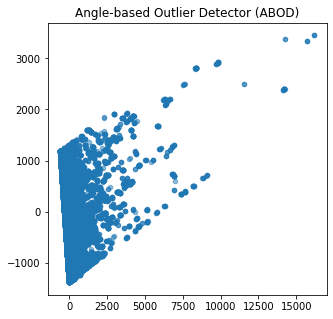

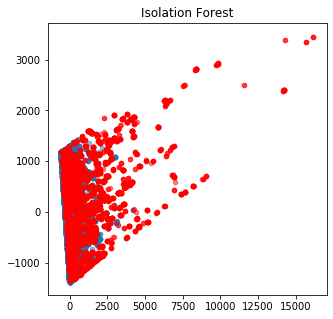

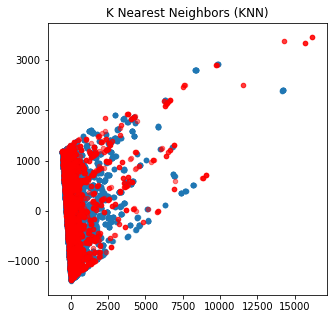

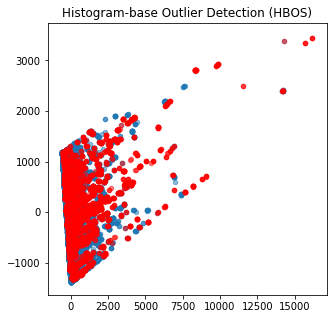

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    
    print(f'MODEL NAME: {clf_name} -> OUTLIERS : {n_outliers} / INLIERS : {n_inliers}')
        
    # Plot data
    plt.figure(figsize=(5, 5))
    X_pca = pca.fit_transform(X)
    pca_df = pd.DataFrame(data = X_pca, columns = ['pca1', 'pca2'])
    pca_df['outlier'] = y_pred.tolist()
    
    outliers = pca_df[pca_df['outlier'] == 1]
    inliers = pca_df[pca_df['outlier'] != 1]
    
    plt.title(clf_name)
    plt.scatter(inliers.loc[:, 'pca1'], inliers.loc[:, 'pca2'], 
                s=20, alpha=0.5, edgecolor=None) 
    plt.scatter(outliers.loc[:, 'pca1'], outliers.loc[:, 'pca2'], c='red', 
                s=20, alpha=0.5, edgecolor=None)